In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image libary in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) #untar is unzipping

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
%ls

datasets/  sample_data/


In [5]:
#converting this data directory into  a pathlib
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count #3670 is my total number of images (dataset)

3670

In [7]:
roses_count = len(list(data_dir.glob('roses/*')))
roses_count

641

In [8]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/5961803532_9368212949_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg'),
 PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'),
 PosixPath('datasets/flower_photos/roses/1402130395_0b89d76029.jpg'),
 PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/15061894841_e5aca59ecd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/9423755543_edb35141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'),
 Posi

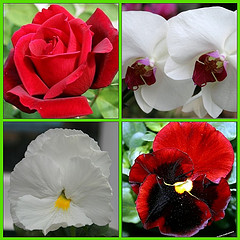

In [9]:
PIL.Image.open(str(roses[1]))

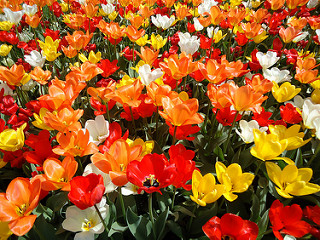

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

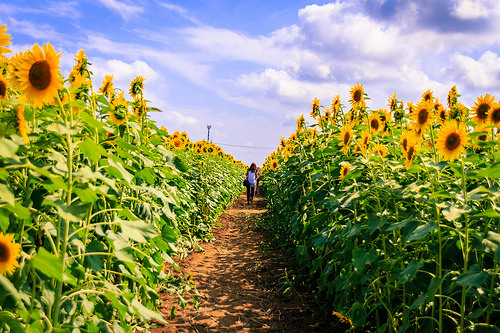

In [11]:
sunflowers = list (data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

In [12]:
# doing a dictionary of different kinds of flowers and the image path associated which will help me during the model build
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [13]:
len(flowers_image_dict['sunflowers'])

699

In [14]:
len(flowers_image_dict['tulips'])

799

In [15]:
#creating a labes for each kind of flower into a number
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [16]:
flowers_labels_dict['roses']

0

In [17]:
flowers_image_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg')

In [18]:
img = cv2.imread(str(flowers_image_dict['roses'][0])) #cv2 doesnt accept a path as an argument so we will convert into a string array
img.shape
# as we can see our data is in a 3D array (x,y,rgb channel)

(333, 500, 3)

In [19]:
#open cv has a function allows us to resize an image
cv2.resize(img,(180,180)).shape
# now our imgs are resized into (180,180,3)

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180)) #machine learning expects that all images are in the same dimension thats why we are resizing
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])



In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
X = np.array(X)
y = np.array(y)

array([[[ 44,  71,  42],
        [ 41,  64,  41],
        [ 44,  66,  37],
        ...,
        [ 35,  80,  44],
        [ 31,  71,  43],
        [ 26,  66,  40]],

       [[ 43,  67,  40],
        [ 42,  64,  40],
        [ 43,  63,  35],
        ...,
        [ 37,  79,  47],
        [ 34,  73,  43],
        [ 30,  67,  38]],

       [[ 45,  67,  41],
        [ 42,  64,  37],
        [ 45,  63,  38],
        ...,
        [ 42,  82,  46],
        [ 38,  77,  46],
        [ 34,  68,  43]],

       ...,

       [[ 44,  90,  47],
        [ 48,  91,  55],
        [ 49,  97,  59],
        ...,
        [ 37,  81,  62],
        [ 47,  98,  58],
        [ 55, 101,  61]],

       [[ 45,  94,  51],
        [ 45,  93,  51],
        [ 45,  88,  50],
        ...,
        [ 51,  92,  65],
        [ 64, 109,  69],
        [ 68, 107,  67]],

       [[ 47,  98,  58],
        [ 46,  92,  48],
        [ 43,  77,  43],
        ...,
        [ 66, 106,  73],
        [ 70, 112,  75],
        [ 71, 108,  69]]], dtype=uint8)
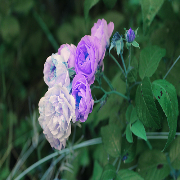

In [23]:
X[0]

In [24]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
len(X_train)

2752

In [26]:
len(X_test)

918

In [27]:
#scaling the images into a range between 0 and 1 which helps in the model training
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

array([[[137,  65,  24],
        [135,  63,  21],
        [142,  68,  25],
        ...,
        [142,  76,  26],
        [147,  77,  23],
        [147,  75,  21]],

       [[139,  65,  23],
        [139,  64,  24],
        [139,  65,  23],
        ...,
        [139,  72,  24],
        [149,  79,  27],
        [147,  76,  26]],

       [[136,  64,  22],
        [140,  66,  24],
        [141,  67,  25],
        ...,
        [139,  73,  25],
        [141,  73,  23],
        [144,  76,  23]],

       ...,

       [[ 96, 110, 210],
        [101, 113, 206],
        [ 99, 112, 207],
        ...,
        [ 54,  30,  24],
        [ 52,  27,  21],
        [ 51,  25,  19]],

       [[ 91, 110, 211],
        [ 99, 108, 209],
        [ 96, 105, 200],
        ...,
        [ 50,  27,  21],
        [ 51,  28,  22],
        [ 47,  27,  20]],

       [[100, 126, 217],
        [ 94, 102, 205],
        [ 84,  87, 183],
        ...,
        [ 49,  27,  21],
        [ 52,  29,  22],
        [ 50,  27,  20]]], dtype=uint8)
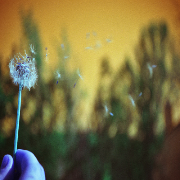

In [28]:
X_train[0]

In [29]:
X_trained_scaled[0]

array([[[0.5372549 , 0.25490196, 0.09411765],
        [0.52941176, 0.24705882, 0.08235294],
        [0.55686275, 0.26666667, 0.09803922],
        ...,
        [0.55686275, 0.29803922, 0.10196078],
        [0.57647059, 0.30196078, 0.09019608],
        [0.57647059, 0.29411765, 0.08235294]],

       [[0.54509804, 0.25490196, 0.09019608],
        [0.54509804, 0.25098039, 0.09411765],
        [0.54509804, 0.25490196, 0.09019608],
        ...,
        [0.54509804, 0.28235294, 0.09411765],
        [0.58431373, 0.30980392, 0.10588235],
        [0.57647059, 0.29803922, 0.10196078]],

       [[0.53333333, 0.25098039, 0.08627451],
        [0.54901961, 0.25882353, 0.09411765],
        [0.55294118, 0.2627451 , 0.09803922],
        ...,
        [0.54509804, 0.28627451, 0.09803922],
        [0.55294118, 0.28627451, 0.09019608],
        [0.56470588, 0.29803922, 0.09019608]],

       ...,

       [[0.37647059, 0.43137255, 0.82352941],
        [0.39607843, 0.44313725, 0.80784314],
        [0.38823529, 0

In [30]:
num_classes = 5
model = Sequential([
  #CNN
  layers.Conv2D(16, 3, padding='same', activation='relu'),#16 filters and 3x3 size
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #flatten
  layers.Flatten(),

  #dense
  layers.Dense(128, activation= 'relu'),

  #last layer(outputlayer) with 5 neurons
  layers.Dense(num_classes)
])

# compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

#training the model

model.fit(X_trained_scaled, y_train , epochs=30)

Epoch 1/30
86/86 [==============================] - 84s 960ms/step - loss: 1.3572 - accuracy: 0.4273
Epoch 2/30
39/86 [============>.................] - ETA: 45s - loss: 1.1030 - accuracy: 0.5433

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
#since we have 99% accuracy of training dataset and 66% of test dataset this is an example of overfiting
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])
score

In [ ]:
np.argmax([0,780,123,8])

In [ ]:
np.argmax(score)

In [ ]:
y_test[2]

In [ ]:
#data augmentation

data_augmentation = keras.Sequential(
    [
    layers.experimental.preprocessing.RandomContrast(0.3)

    ]
    )

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))